## Image Preprocessing: Grayscale Conversion and Edge Detection

In [15]:

# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_image(image_path, target_size=(256, 256)):
    '''
    Preprocesses an image: Converts to grayscale and applies edge detection.
    :param image_path: Path to the image file
    :param target_size: Desired image size (height, width)
    :return: Processed image array
    '''
    # Load image
    img = load_img(image_path, target_size=target_size)
    img = img_to_array(img).astype(np.uint8)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray, threshold1=50, threshold2=150)

    # Normalize image to range [0,1]
    edges = edges / 255.0

    return edges.reshape(target_size[0], target_size[1], 1)  # Keep single channel format

# Example usage:
# processed_img = preprocess_image("path_to_image.jpg")


In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [17]:
# Set the path to the dataset
dataset_path = r'D:\IIT\Subjects\(4605)IRP\Devlo\Augmented_DataSet'

In [18]:
# Define image dimensions and other constants
img_height, img_width = 256, 256  # Image resolution
batch_size = 32
num_classes = 4  # 4 classes: Healthy, Live Wood, Pink Wax, Stem Canker

In [19]:
# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split 80% training, 20% validation
)

In [20]:
# Load training data
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Training subset
)

Found 7656 images belonging to 4 classes.


In [21]:
# Load validation data
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Validation subset
)

Found 1914 images belonging to 4 classes.


In [22]:
# Build CNN model
model = Sequential()

In [23]:
# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

c:\Users\ridmi\.conda\envs\TenserFlow\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Flatten and Fully Connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # Output layer with 4 classes

In [25]:
# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,492 (56.61 MB)

 Trainable params: 14,839,492 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=30  # Adjust the number of epochs as needed
)

c:\Users\ridmi\.conda\envs\TenserFlow\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 353s 1s/step - accuracy: 0.3609 - loss: 1.4670 - val_accuracy: 0.4947 - val_loss: 1.0669
Epoch 2/30
  1/239 ━━━━━━━━━━━━━━━━━━━━ 2:29 627ms/step - accuracy: 0.3125 - loss: 1.3974

c:\Users\ridmi\.conda\envs\TenserFlow\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


239/239 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - accuracy: 0.3125 - loss: 1.3974 - val_accuracy: 0.5042 - val_loss: 1.0803
Epoch 3/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 217s 906ms/step - accuracy: 0.5248 - loss: 1.0932 - val_accuracy: 0.5312 - val_loss: 0.9956
Epoch 4/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 26s 106ms/step - accuracy: 0.7500 - loss: 0.6766 - val_accuracy: 0.4931 - val_loss: 1.0861
Epoch 5/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 233s 977ms/step - accuracy: 0.6135 - loss: 0.9469 - val_accuracy: 0.5630 - val_loss: 1.0026
Epoch 6/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 31s 126ms/step - accuracy: 0.5000 - loss: 0.8781 - val_accuracy: 0.5768 - val_loss: 0.9753
Epoch 7/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 216s 902ms/step - accuracy: 0.6452 - loss: 0.8642 - val_accuracy: 0.5964 - val_loss: 0.9426
Epoch 8/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.6562 - loss: 0.7798 - val_accuracy: 0.6081 - val_loss: 0.9225
Epoch 9/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 216s 903ms/step - accuracy: 0.6494 - loss: 0.8504 -

In [28]:
# Save the model
model.save('D:\IIT\Subjects\(4605)IRP\Devlo\models\CNN_model_Gray.h5')

In [29]:
# Evaluate the model
score = model.evaluate(validation_generator)
print(f"Validation Loss: {score[0]}")
print(f"Validation Accuracy: {score[1]}")

60/60 ━━━━━━━━━━━━━━━━━━━━ 25s 417ms/step - accuracy: 0.6128 - loss: 0.9215
Validation Loss: 0.9254507422447205
Validation Accuracy: 0.6128526926040649


Found 958 files belonging to 4 classes.
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step


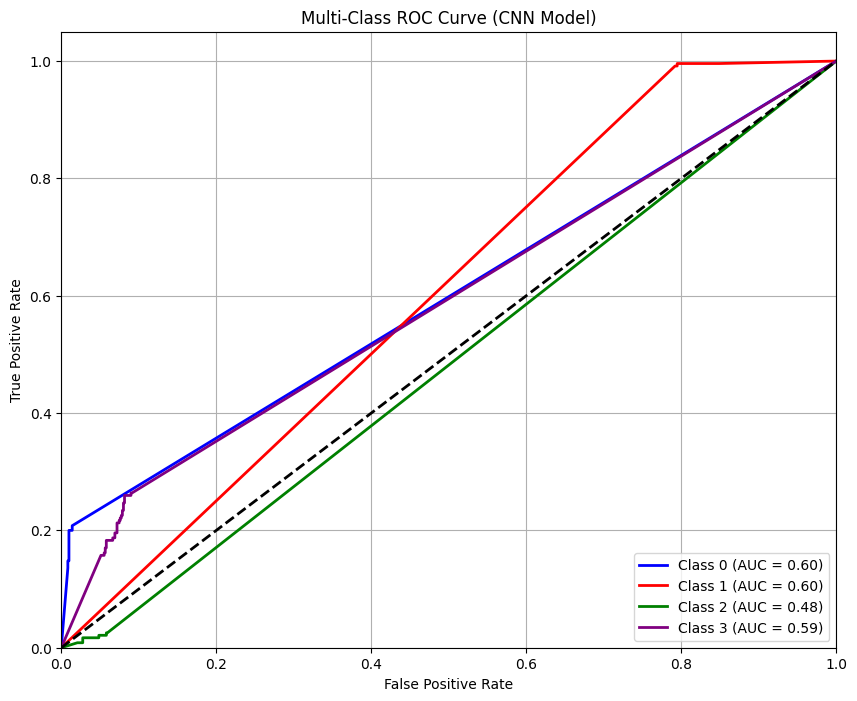

In [1]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Load your model
model = load_model(r"D:\IIT\Subjects\(4605)IRP\Devlo\models\CNN_model_Gray.h5")  # Correct model path

# Load Test Dataset with correct image size (256x256)
TEST_PATH = r"D:\IIT\Subjects\(4605)IRP\Devlo\Augmented_DataSet_Split\test"

test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_PATH,
    shuffle=False,
    batch_size=32,
    image_size=(256, 256)   # <<< VERY IMPORTANT: Match model's input size!!
)

# Now predict normally (no flattening)
y_pred = model.predict(test_ds)

# Get true labels
y_true = np.concatenate([y.numpy() for x, y in test_ds], axis=0)

# Binarize true labels
y_true_bin = label_binarize(y_true, classes=range(y_pred.shape[1]))

# Calculate ROC and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_pred.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'purple', 'orange']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i % len(colors)],
             lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve (CNN Model)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
